In [1]:
# Imports libraries 
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import os
import mediapy as media
from tqdm import tqdm
import mujoco_viewer

# Robotics toolbox and dependencies
import roboticstoolbox as rtb
import spatialmath as sm
from spatialmath import UnitQuaternion, SE3
from spatialmath.base import q2r, r2x, rotx, roty, rotz, r2q, q2r
from mujoco_parser import MuJoCoParserClass

# Import local libraries
from Ur5e import Ur5e
from actuator import ActuatorMotor, update_actuator
from quaternion_helper import *

In [2]:
# Make ur5e instance
if 'ur5e' in locals():
    print('ur5e already exists')
    del ur5e

try:
    ur5e
except NameError:
    print('ur5e does not exist')
    ur5e = Ur5e()

ur5e does not exist


In [3]:
# Make actuator instance torque controlled
try:
    actuator
except NameError:
    actuator = ActuatorMotor()

forces_ctrl_range = np.array([[-150, 150], [-150, 150], [-150, 150], [-28, 28], [-28, 28], [-28, 28]])

for actuator_id in range(ur5e.m.nu):
    update_actuator(ur5e.m, actuator_id, actuator, ctrlrange=forces_ctrl_range[actuator_id])

In [4]:
# Visualize mujoco, Show initial state of the scene

# Use forward dynamics to get the initial state of the data
mujoco.mj_forward(ur5e.m, ur5e.d)
# render the initial state
if 'renderer' in locals():
    print('renderer already exists')
    del renderer


try:
    renderer
except NameError:
    renderer = mujoco.Renderer(ur5e.m, 480, 640)


#renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
#media.show_image(renderer.render())

# Trajectory

In [5]:
poi = np.array([
    #[93, 243],
    [500, 550],
    [130, 243],
    [130, 223],
    [175, 223],
    [175, 263],
    [130, 263],
    [130, 223],
    [175, 223],
    [175, 243],
    [213, 243],
    [213, 223],
    [254, 223],
    [254, 164],
    [334, 164],
    [334, 144],
    [379, 144],
    [379, 184],
    [334, 184],
    [334, 144],
    
])

poi = poi + np.array([0, -281])

print(poi)
#plt.plot(poi[:, 0], poi[:, 1])
#plt.show()

'''
    [379, 144],
    [379, 164],
    [663, 164],
    [663, 271],
    [648, 271],
    [648, 289],
    [663, 289],
    [663, 392],
    [379, 392],
    [379, 372],
    [334, 372],
    [334, 412],
    [379, 412],
    [379, 372],
    [334, 372],
    [334, 392],
    [254, 392],
    [254, 339],
    [213, 339],
    [213, 319],
    [175, 319],
    [175, 339],
    [130, 339],
    [130, 319],
    [93, 319],
    [130, 319],
    [130, 299],
    [175, 299],
    [175, 319],
    [213, 319],
    [213, 299],
    [297, 299],
    [297, 339],
    [213, 339],
    [213, 299],
    [297, 299],
    [297, 319],
    [334, 319],
    [334, 299],
    [379, 299],
    [379, 339],
    [334, 339],
    [334, 299],
    [379, 299],
    [379, 319],
    [435, 319],
    [435, 292],
    [444, 281],
    [480, 281],
    [480, 261],
    [525, 261],
    [525, 281],
    [565, 281],
    [565, 301],
    [648, 301],
    [648, 261],
    [565, 261],
    [565, 281],
    [525, 281],
    [525, 301],
    [480, 301],
    [480, 281],
    [444, 281],
    [435, 272],
    [425, 281],
    [435, 292],
    [444, 281],
    [435, 272],
    [435, 243],
    [379, 243],
    [379, 263],
    [334, 263],
    [334, 243],
    [297, 243],
    [297, 263],
    [213, 263],
    [213, 223],
    [297, 223],
    [297, 243],
    [334, 243],
    [334, 223],
    [379, 223],
    [379, 243]
    '''

[[ 500  269]
 [ 130  -38]
 [ 130  -58]
 [ 175  -58]
 [ 175  -18]
 [ 130  -18]
 [ 130  -58]
 [ 175  -58]
 [ 175  -38]
 [ 213  -38]
 [ 213  -58]
 [ 254  -58]
 [ 254 -117]
 [ 334 -117]
 [ 334 -137]
 [ 379 -137]
 [ 379  -97]
 [ 334  -97]
 [ 334 -137]]


'\n    [379, 144],\n    [379, 164],\n    [663, 164],\n    [663, 271],\n    [648, 271],\n    [648, 289],\n    [663, 289],\n    [663, 392],\n    [379, 392],\n    [379, 372],\n    [334, 372],\n    [334, 412],\n    [379, 412],\n    [379, 372],\n    [334, 372],\n    [334, 392],\n    [254, 392],\n    [254, 339],\n    [213, 339],\n    [213, 319],\n    [175, 319],\n    [175, 339],\n    [130, 339],\n    [130, 319],\n    [93, 319],\n    [130, 319],\n    [130, 299],\n    [175, 299],\n    [175, 319],\n    [213, 319],\n    [213, 299],\n    [297, 299],\n    [297, 339],\n    [213, 339],\n    [213, 299],\n    [297, 299],\n    [297, 319],\n    [334, 319],\n    [334, 299],\n    [379, 299],\n    [379, 339],\n    [334, 339],\n    [334, 299],\n    [379, 299],\n    [379, 319],\n    [435, 319],\n    [435, 292],\n    [444, 281],\n    [480, 281],\n    [480, 261],\n    [525, 261],\n    [525, 281],\n    [565, 281],\n    [565, 301],\n    [648, 301],\n    [648, 261],\n    [565, 261],\n    [565, 281],\n    [525, 28

In [6]:
# Generate trajectory

#startpos = np.array([0, 0, 0])
T0 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0]) # sm.SE3.Trans(0.5, 0, 0.3) * sm.SE3.RPY([0, np.pi, 0]) changed z from 0.3 to 0.4 to avoid collision
T1 = sm.SE3.Trans(0.0, 0, 0.301) * sm.SE3.RPY([0, np.pi, 0])
dt = 0.002 
endTime = 0.3
n = int(endTime/dt)

if 'ctr' not in locals():
    ctr = np.array([])
    times = np.array([])
    startTime = 0
    scalingX = 5000
    scalingY = 2500
    movementX = 0.4
    movementY = 0.0



    for i in tqdm(range(0, poi.shape[0]-1)):
        distance = np.sqrt((poi[i+1, 0] - poi[i, 0])**2 + (poi[i+1, 1] - poi[i, 1])**2)
        endTime = distance*0.05
        n = int(endTime/dt)
        T0.t[0] = movementX + poi[i, 0]/scalingX
        T0.t[1] = movementY + poi[i, 1]/scalingY
        T1.t[0] = movementX + poi[i+1, 0]/scalingX
        T1.t[1] = movementY + poi[i+1, 1]/scalingY
        trajectory = rtb.ctraj(T0, T1, n)
        time = np.linspace(startTime, startTime+endTime, n)
        startTime = startTime+endTime
        if i == 0:
            ctr = trajectory
            times = time
        else:
            x = ctr.Alloc(len(ctr)+len(trajectory))
            for j in range(0, len(ctr)):
                x[j] = ctr[j]
            for j in range(0, len(trajectory)):
                x[j+len(ctr)] = trajectory[j]
            ctr = x
            times = np.append(times, time)



    #differentiate to find velocity
    velocityX = np.gradient(ctr.t[:,0])
    velocityY = np.gradient(ctr.t[:,1])
    velocityZ = np.gradient(ctr.t[:,2])

    velocity = np.transpose(np.array([velocityX, velocityY, velocityZ]))

    #differentiate to find acceleration
    accelerationX  = np.gradient(velocityX)
    accelerationY  = np.gradient(velocityY)
    accelerationZ  = np.gradient(velocityZ)

    acceleration = np.transpose(np.array([accelerationX, accelerationY, accelerationZ]))        
    print(f"No of points in trajectory: {len(ctr)}") 


  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:03<00:00,  5.30it/s]


No of points in trajectory: 29094


In [7]:
'''
# Visualize trajectory
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.plot(ctr.t[:,0], ctr.t[:,1])
axs.set_title("Trajectory in XY plane")
axs.set_aspect(1)



fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in X direction')
axs[0].plot(times, ctr.t[:,0])
axs[0].set_title('Position in X direction')
axs[1].plot(times, velocity[:,0])
axs[1].set_title('Velocity in X direction')
axs[2].plot(times, acceleration[:,0])
axs[2].set_title('Acceleration in X direction')

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Pos, Velocity and Acceleration in Y direction')
axs[0].plot(times, ctr.t[:,1])
axs[0].set_title('Position in Y direction')
axs[1].plot(times, velocity[:,1])
axs[1].set_title('Velocity in Y direction')
axs[2].plot(times, acceleration[:,1])
axs[2].set_title('Acceleration in Y direction')'''




'\n# Visualize trajectory\nfig, axs = plt.subplots(1, 1, figsize=(10, 10))\naxs.plot(ctr.t[:,0], ctr.t[:,1])\naxs.set_title("Trajectory in XY plane")\naxs.set_aspect(1)\n\n\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in X direction\')\naxs[0].plot(times, ctr.t[:,0])\naxs[0].set_title(\'Position in X direction\')\naxs[1].plot(times, velocity[:,0])\naxs[1].set_title(\'Velocity in X direction\')\naxs[2].plot(times, acceleration[:,0])\naxs[2].set_title(\'Acceleration in X direction\')\n\nfig, axs = plt.subplots(3, 1, figsize=(10, 10))\nfig.suptitle(\'Pos, Velocity and Acceleration in Y direction\')\naxs[0].plot(times, ctr.t[:,1])\naxs[0].set_title(\'Position in Y direction\')\naxs[1].plot(times, velocity[:,1])\naxs[1].set_title(\'Velocity in Y direction\')\naxs[2].plot(times, acceleration[:,1])\naxs[2].set_title(\'Acceleration in Y direction\')'

[ 3.10261937 -1.50531693  1.85986479 -1.92534418 -1.57079633  1.53182305]


""

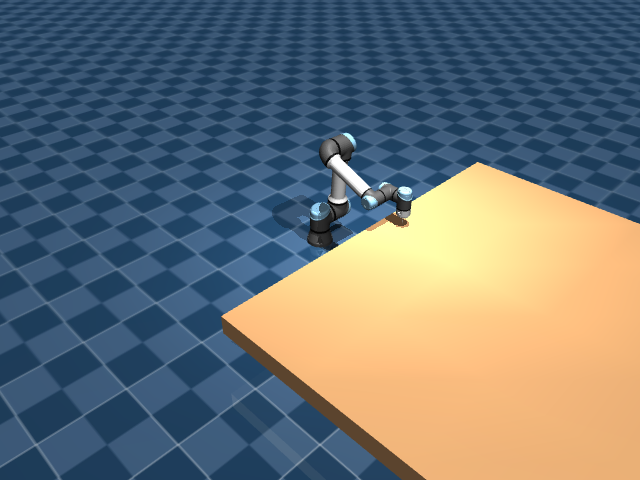

In [11]:
# Use the inverse kinematics to make a start pose for the robot
sol = ur5e.invkin(ctr[0])
print(sol.q)
# visualize the position
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)
renderer.update_scene(ur5e.d, camera="fixed", scene_option=dict())
# show image
media.show_image(renderer.render())
# joints pose
# 0.27174445, -1.40474226, -2.07800756, -1.2296391,   1.57079635,  1.84254078

# Controller

In [104]:
import numpy as np
import mujoco
from tqdm import tqdm

# Define Impedance Control Matrices
STIFFNESS = np.array([5000, 5000, 5000, 250, 250, 250])  # Stiffness matrix - 5550
DAMPING_RATIO = 1  # Critical damping
DAMPING = 2 * DAMPING_RATIO * np.sqrt(STIFFNESS)
#MAX_TORQUE = np.array([150.0, 150.0, 150.0, 28.0, 28.0, 28.0])

# Compliance parameters
compliance_vector = np.array([1, 1, 1, 1, 1, 1])

# Initialize error terms
x_e = np.zeros(6)  # Position error
v_e = np.zeros(6)  # Velocity error

duration = 5  # seconds
framerate = 30  # Hz
stepsize = ur5e.m.opt.timestep
n_steps = int(np.ceil(duration / stepsize))
showVideo = True

# Logging and video capture
contact_points = []
contact_forces = []
frames = []
positions_as_quat = np.zeros((n_steps, 7))
positions_as_rpy = np.zeros((n_steps, 6))
velocities = np.zeros((n_steps, 6))
forces = np.zeros((n_steps, 6))  # Ensure forces match 6D wrench
torques = np.zeros((n_steps, 6))
target_positions_as_quat = np.zeros((n_steps, 7))
target_positions = np.zeros((n_steps, 6))
target_velocities = np.zeros((n_steps, 6))
contact_points = []
contact_forces = []
p_contacts_log = np.zeros((n_steps, 4))
time_log = []
force_log = []  # to store the first 3 components of the external force

# Reset MuJoCo Simulation
mujoco.mj_resetData(ur5e.m, ur5e.d)
ur5e.d.qpos[:] = sol.q
mujoco.mj_forward(ur5e.m, ur5e.d)

progress_bar = tqdm(total=duration)
idx = 0

while ur5e.d.time < duration and idx < n_steps:
    progress_bar.update(stepsize)
    
    # Get Cartesian position and Jacobian
    tcp_pos = ur5e.fkine(ur5e.d.qpos)
    J = ur5e.jacob0(ur5e.d.qpos)
    #dJ = ur5e.djacob0(ur5e.d.qpos, ur5e.d.qvel, representation=None)
    if(np.abs(np.linalg.det(J)) <= 0.001):
        print("Singular configuration ", ur5e.d.time, np.linalg.det(J))
        break
    # Get force at the end effector
    f_ext = np.zeros(6)
    contact_points, contact_forces, _, _, _ = ur5e.get_contact_info()
    if len(contact_forces):
        f_ext[:3] = contact_forces[0]
    '''
    # Get external force at the end effector
    contact_point = np.array([0,0,0,0])
    p_contacts,f_contacts,geom1s,geom2s,distance = ur5e.get_contact_info()

    if(len(f_contacts)):
        h_e = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
        #print(f_contacts[0])
        h_e[0] = f_contacts[0][0]
        h_e[1] = f_contacts[0][1]
        h_e[2] = f_contacts[0][2]
        contact_point[0]  = p_contacts[0][0]
        contact_point[1]  = p_contacts[0][1]
        contact_point[2]  = p_contacts[0][2]
        contact_point[3]  = distance[0]
    p_contacts_log[idx] = contact_point
    
    for i in range(forces.shape[0]):
        if(forces[i,2] > 0 & i%100):
            #print("Force z", forces[i,2], "at time", i*stepsize)
            if forces[i,2] < 300:
                print("Force z", forces[i,2], "at time", i*stepsize)
                break
            break
    '''
    p_contacts, f_contacts, geom1s, geom2s, p_distance= ur5e.get_contact_info()

    for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
        for p in p_contacts:  # Store all contact points
            contact_points.append(list(p))

        contact_forces.append(list(f_contact))
    #p_contacts, f_contacts, geom1s, geom2s, p_distance = ur5e.get_contact_info()
    #for (p_contact, f_contact, geom1, geom2) in zip(p_contacts, f_contacts, geom1s, geom2s):
    #    contact_points.append(list(p_contact))  # Store X, Y, Z
    #    contact_forces.append(np.linalg.norm(f_contact))  # Store magnitude of force

    # Compute trajectory error
    target_pose = tcp_pos 
    x_diff = [0.15 * (1 - np.cos(n_steps*0.01)), 0, 0.05 * (1 - np.cos(n_steps*0.01)), 0, 0, 0]
    target_pose = tcp_pos * sm.SE3.Trans(x_diff[0], x_diff[1], x_diff[2])
    error_in_base_frame = np.concatenate((target_pose.t - tcp_pos.t, np.zeros(3)))  # Ensure 6D error

    # How it is done in URscript version (convert current pose into TCP frame, uses tcp_pos from fkin)
    error_SE3 = tcp_pos.inv() * target_pose  # Compute error in TCP frame
    error_translation = error_SE3.A[:3, 3]  # XYZ
    error_rotation = sm.SO3(error_SE3.R).rpy(order="xyz")  # Roll-pitch-yaw
    error_in_TCP_frame = np.concatenate((error_translation, error_rotation))  # Convert to NumPy
    #print("error TCP frame" ,error_in_TCP_frame)
    #print("error base frame2" ,error_in_base_frame)
    v_e = J @ ur5e.d.qvel
    
    # Compute impedance force
    wrench = STIFFNESS * error_in_base_frame - DAMPING * v_e #- f_ext
    
    # Compute joint forces
    tau = J.T @ wrench
    mass_matrix = np.zeros((6, 6))  
    mujoco.mj_fullM(ur5e.m, mass_matrix, ur5e.d.qM)
    coriolis_forces = ur5e.d.qfrc_bias.copy()  # ??
    tau += mass_matrix @ ur5e.d.qacc + coriolis_forces
    
    # Clamp torques
    #tau = np.clip(tau, -MAX_TORQUE, MAX_TORQUE)
    
    ##########################################################################################
    ##### Meget computationally heavy, kun gør hvis man har brug for x, v og a plots #########
    ##########################################################################################
    # get translational part of T_pen_array
    #p = np.zeros((len(ctr), 2))
    #for i in range(len(ctr)):
    #    p[i] = ctr[i].t[0:2]
    #p = np.hstack((p, np.zeros((len(ctr), 1)), np.ones((len(ctr), 1)), np.zeros((len(ctr), 1))))
    #dp = np.gradient(p, axis=0)
    #ddp = np.gradient(dp, axis=0)

    # Apply torque control
    ur5e.d.ctrl[:] = tau
    
    # Log data
    quat_e = r2q(tcp_pos.R)
    positions_as_quat[idx] = np.concatenate((tcp_pos.t, quat_e))
    positions_as_rpy[idx] = np.concatenate([tcp_pos.t, tcp_pos.rpy(order='xyz')])
    velocities[idx] = v_e
    forces[idx] = wrench  # Ensure correct shape
    torques[idx] = tau
    target_positions_as_quat[idx] = positions_as_quat[idx]
    target_positions[idx] = positions_as_rpy[idx]
    target_velocities[idx] = velocities[idx]
    time_log.append(ur5e.d.time)
    force_log.append(f_ext[:3])
    
    # Capture video frames
    if len(frames) < ur5e.d.time * framerate:
        renderer.update_scene(ur5e.d, camera="fixed4", scene_option=dict())
        pixels = renderer.render()
        frames.append(pixels)
    
    # Step simulation
    mujoco.mj_step(ur5e.m, ur5e.d)
    idx += 1

progress_bar.close()

# Show video
if showVideo:
    media.show_video(frames, fps=framerate)
#print(forces)

100%|█████████▉| 4.999999999999671/5 [00:02<00:00,  1.82it/s]  


Sample force magnitudes: [32.18392352  6.81300597  6.19884437  6.70846101 11.22068918  5.47153814
  4.57838484  3.52490751  2.27417111  3.87078328]
Sample x-values: (0.11459468459720458, 0.11459468459720458, 0.1145946812473886, 0.11459467842570144, 0.11459546444759051, 0.1145964655470302, 0.11459766907391485, 0.11460512720986402, 0.11460505532827558, 0.1146048071313574)
Sample y-values: (-0.5002727438452625, -0.5002727438452625, -0.5002721489297985, -0.5002693839225677, -0.5002453355071426, -0.5002212900556704, -0.5001910448894338, -0.499550760211111, -0.4994342652376863, -0.4993170745922558)
Sample Z-values: (0.29999999994824283, 0.29999999994824283, 0.29999966533379013, 0.29999947708821817, 0.2999981704190087, 0.2999977866056048, 0.2999997231303922, 0.2999933173462635, 0.2999860778578193, 0.2999790752246852)


/tmp/ipykernel_7491/4052078969.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sc, ax=axs, pad=0.05, aspect=40)


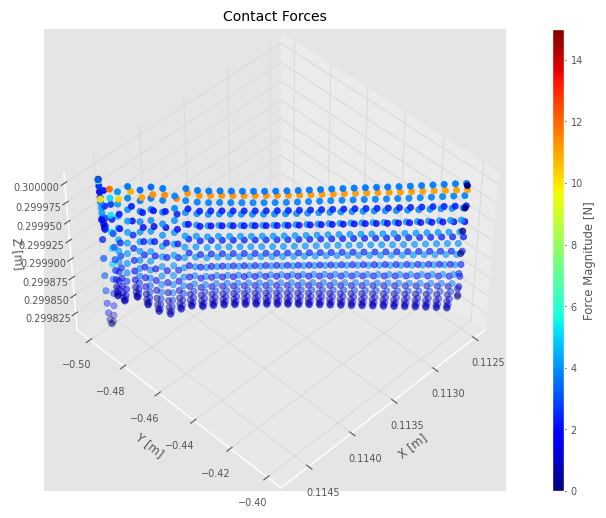

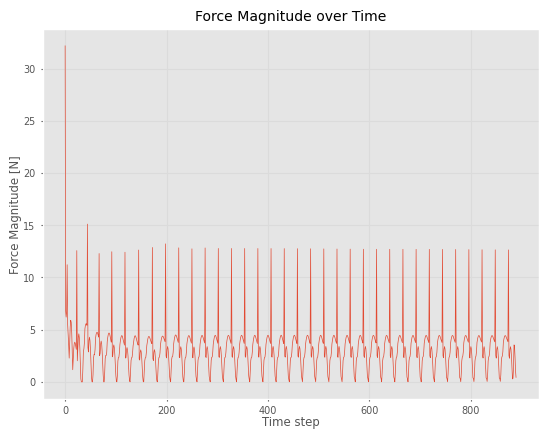

In [103]:
# Convert logs to NumPy arrays
time_log = np.array(time_log)          # shape: (n_steps,)
force_log = np.array(force_log)        # shape: (n_steps, 3)

# Optionally, compute the overall magnitude of the force vector at each step
force_magnitude = np.linalg.norm(force_log, axis=1)
plt.figure(figsize=(10, 6))
#plt.plot(time_log, force_log[:, 0], label='Force X', color='r')
#plt.plot(time_log, force_log[:, 1], label='Force Y', color='g')
plt.plot(time_log, force_log[:, 2], label='Force Z', color='b')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.title('Z Force Components Over Time')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')
plt.xlabel('Time [s]')
plt.ylabel('Force Magnitude [N]')
plt.title('Contact Force Magnitude Over Time')
plt.legend()
plt.grid(True)
plt.show()


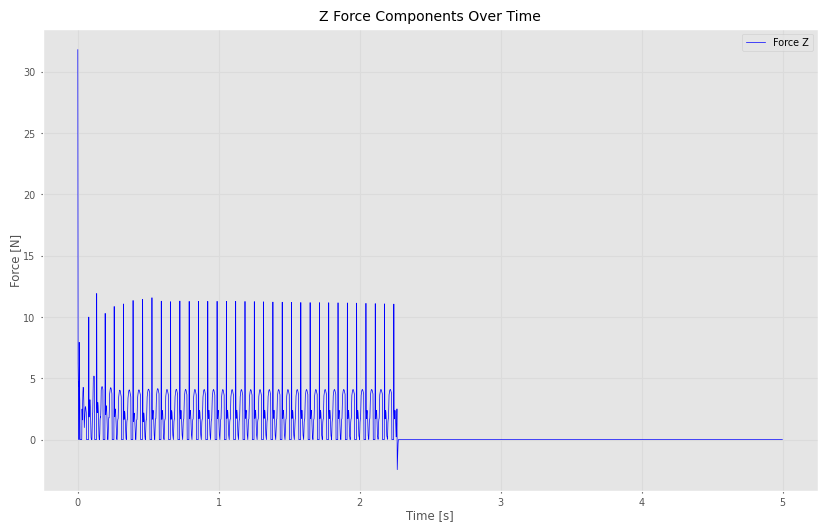

"\nplt.figure(figsize=(10, 6))\nplt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')\nplt.xlabel('Time [s]')\nplt.ylabel('Force Magnitude [N]')\nplt.title('Contact Force Magnitude Over Time')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [106]:
# Convert logs to NumPy arrays
time_log = np.array(time_log)          # shape: (n_steps,)
force_log = np.array(force_log)        # shape: (n_steps, 3)

# Optionally, compute the overall magnitude of the force vector at each step
force_magnitude = np.linalg.norm(force_log, axis=1)
plt.figure(figsize=(10, 6))
#plt.plot(time_log, force_log[:, 0], label='Force X', color='r')
#plt.plot(time_log, force_log[:, 1], label='Force Y', color='g')
plt.plot(time_log, force_log[:, 2], label='Force Z', color='b')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.title('Z Force Components Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''
plt.figure(figsize=(10, 6))
plt.plot(time_log, force_magnitude, label='Force Magnitude', color='k')
plt.xlabel('Time [s]')
plt.ylabel('Force Magnitude [N]')
plt.title('Contact Force Magnitude Over Time')
plt.legend()
plt.grid(True)
plt.show()
'''

In [18]:
#print("work_done_log shape", work_done_log)  # Now it's a scalar

# For total torque, which is already a 6D vector
#print("total_torque_log shape", total_forces)

(2500, 6)


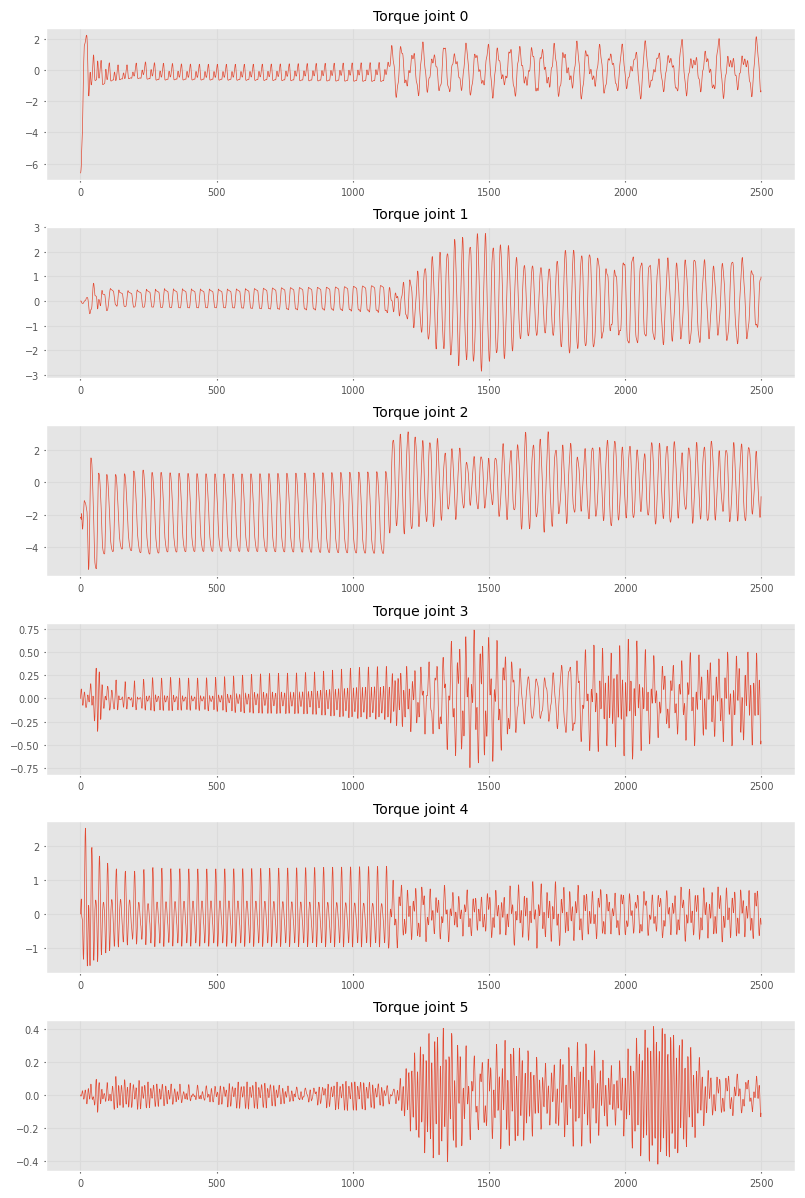

In [78]:
import pandas as pd

# Create a time array based on simulation steps
time = np.linspace(0, duration, n_steps)

# Convert forces into a DataFrame
#force_columns = ["Force_X", "Force_Y", "Force_Z", "Torque_X", "Torque_Y", "Torque_Z"]
#force_df = pd.DataFrame(forces, columns=force_columns)
#force_df["Time"] = time  # Add time column

# Save to CSV
#force_df.to_csv("logged_forces.csv", index=False)

# Print a preview of the data
#print(force_df.head())

import matplotlib.pyplot as plt

# Ensure time is a 1D NumPy array
#ime = force_df["Time"].to_numpy()

fig, axs = plt.subplots(6, 1, figsize=(8, 12))
# print size of forces
print(forces.shape)
axs[0].plot(forces[:,0])
axs[0].set_title('forces joint 0')

axs[1].plot(forces[:,1])
axs[1].set_title('forces joint 1')

axs[2].plot(forces[:,2])
axs[2].set_title('forces joint 2')

axs[3].plot(forces[:,3])
axs[3].set_title('forces joint 3')

axs[4].plot(forces[:,4])
axs[4].set_title('forces joint 4')

axs[5].plot(forces[:,5])
axs[5].set_title('forces joint 5')

plt.tight_layout()
plt.show()



(2500, 6)


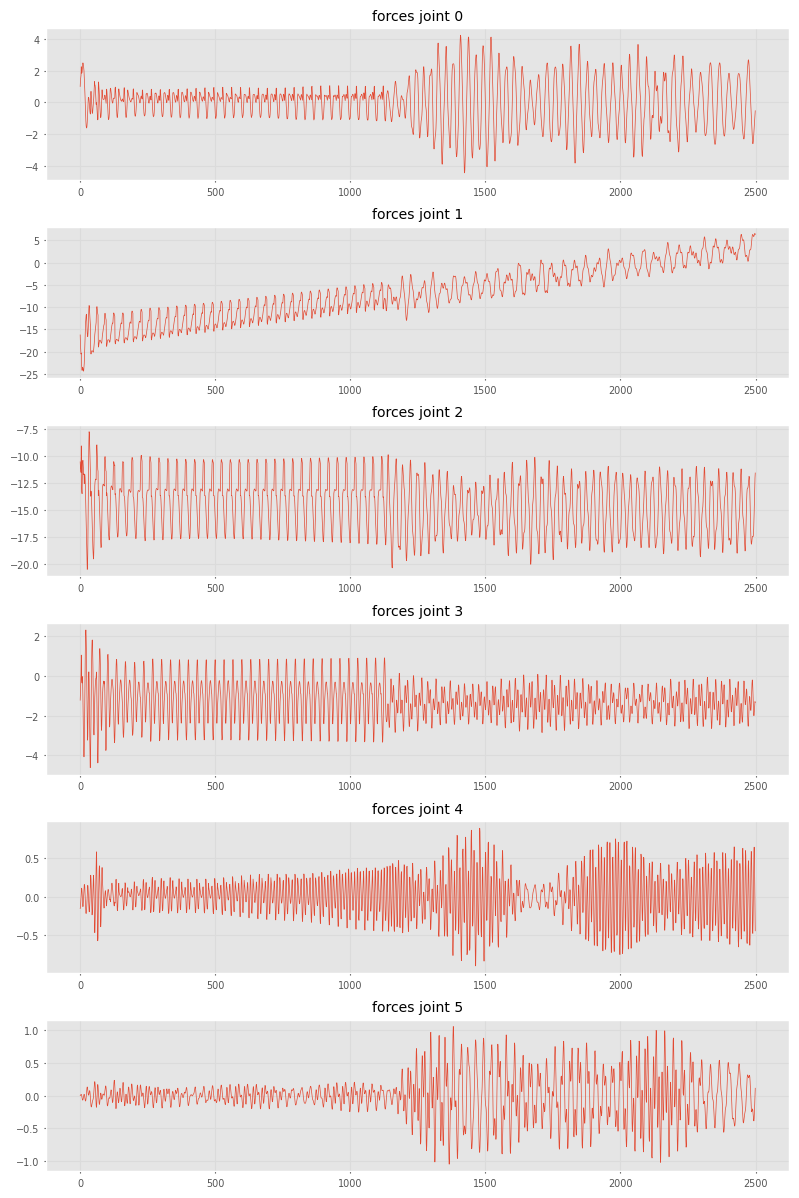

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a time array based on simulation steps
time = np.linspace(0, duration, n_steps)

fig, axs = plt.subplots(6, 1, figsize=(8, 12))
# print size of torques
print(torques.shape)
axs[0].plot(torques[:,0])
axs[0].set_title('forces joint 0')

axs[1].plot(torques[:,1])
axs[1].set_title('forces joint 1')

axs[2].plot(torques[:,2])
axs[2].set_title('forces joint 2')

axs[3].plot(torques[:,3])
axs[3].set_title('forces joint 3')

axs[4].plot(torques[:,4])
axs[4].set_title('forces joint 4')

axs[5].plot(torques[:,5])
axs[5].set_title('forces joint 5')

plt.tight_layout()
plt.show()



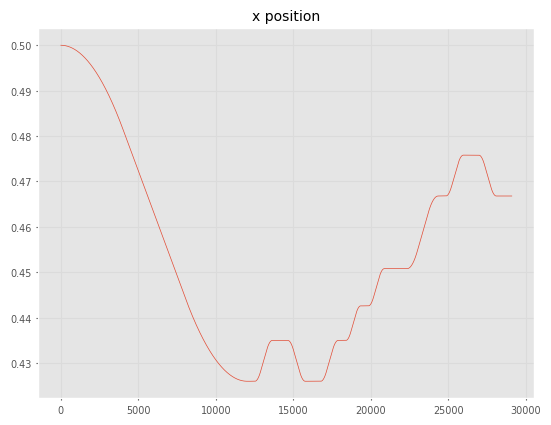

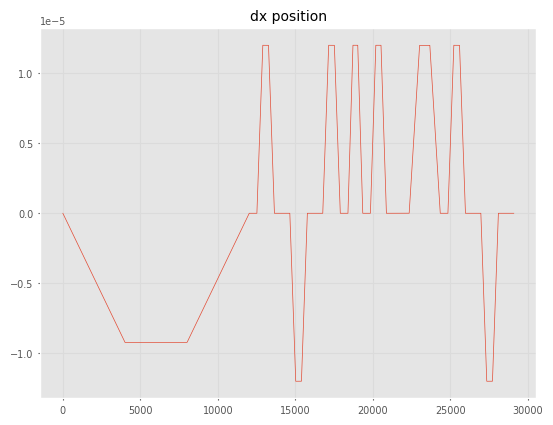

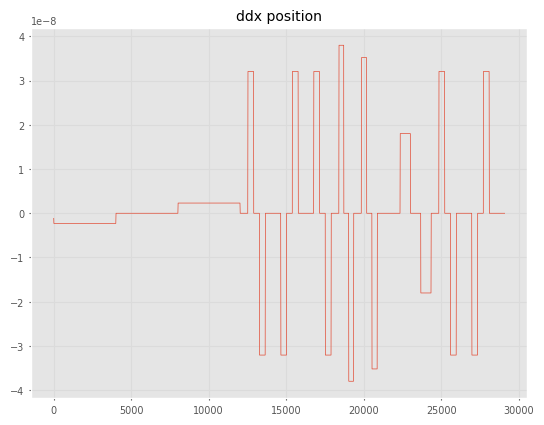

In [87]:
xpos = p[:,0]
ypos = p[:,1]

dxpos = dp[:,0]
dypos = dp[:,1]

ddxpos = ddp[:,0]
ddypos = ddp[:,1]

#xposition
plt.plot(xpos)
plt.title("x position")
plt.show()

plt.plot(dxpos)
plt.title("dx position")
plt.show()

plt.plot(ddxpos)
plt.title("ddx position")
plt.show()


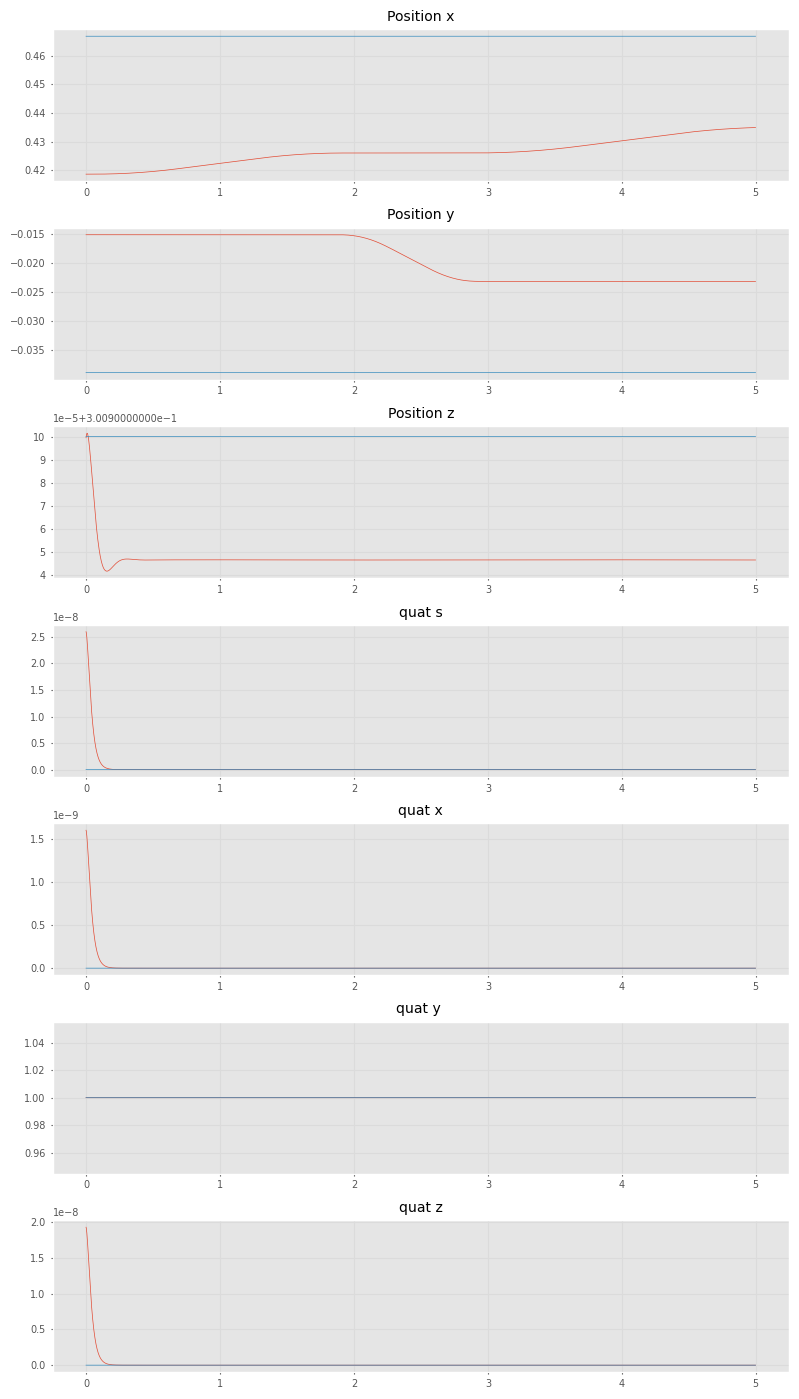

In [40]:
fig, axs = plt.subplots(7, 1, figsize=(8, 14))

axs[0].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,0])
axs[0].plot(np.arange(n_steps)*stepsize, T0.t[0]*np.ones(n_steps))
axs[0].set_title('Position x')

axs[1].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,1])
axs[1].plot(np.arange(n_steps)*stepsize, T0.t[1]*np.ones(n_steps))
axs[1].set_title('Position y')

axs[2].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,2])
axs[2].plot(np.arange(n_steps)*stepsize, 0.301*np.ones(n_steps))
#axs[2].set_ylim([0.2, 0.4])
axs[2].set_title('Position z')

axs[3].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,6])
axs[3].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[0]*np.ones(n_steps))
axs[3].set_title('quat s')

axs[4].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,3])
axs[4].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[1]*np.ones(n_steps))
axs[4].set_title('quat x')

axs[5].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,4])
axs[5].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[2]*np.ones(n_steps))
axs[5].set_title('quat y ')

axs[6].plot(np.arange(n_steps)*stepsize, positions_as_quat[:,5])
axs[6].plot(np.arange(n_steps)*stepsize, r2q(T0.R)[3]*np.ones(n_steps))
axs[6].set_title('quat z')

plt.tight_layout()
plt.show()


##### Force plot


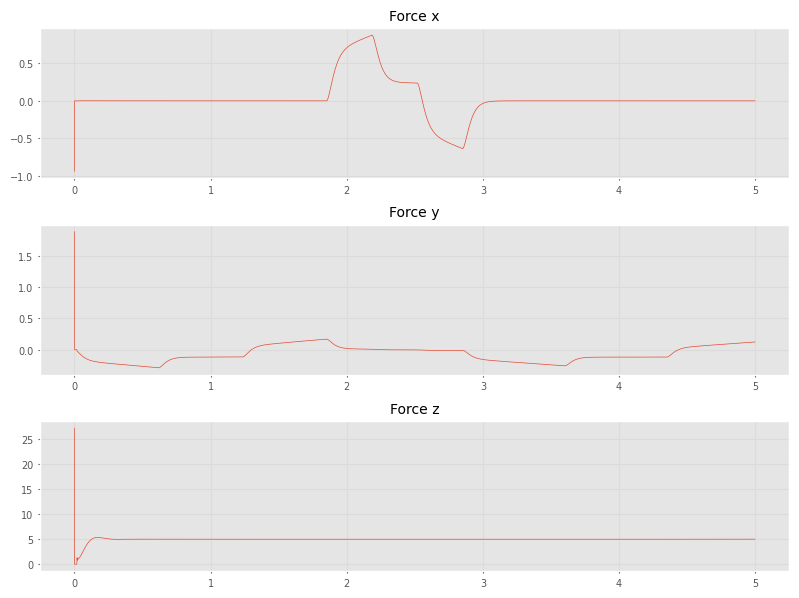

Force z 27.141668113667095 at time 0.0


In [41]:

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(np.arange(n_steps)*stepsize, forces[:,0])
axs[0].set_title('Force x')

axs[1].plot(np.arange(n_steps)*stepsize, forces[:,1])
axs[1].set_title('Force y')

axs[2].plot(np.arange(n_steps)*stepsize, forces[:,2])
axs[2].set_title('Force z')


plt.tight_layout()
plt.show()

for i in range(forces.shape[0]):
    if(forces[i,2] > 0):
        print("Force z", forces[i,2], "at time", i*stepsize)
        break

##### Joint pos plot

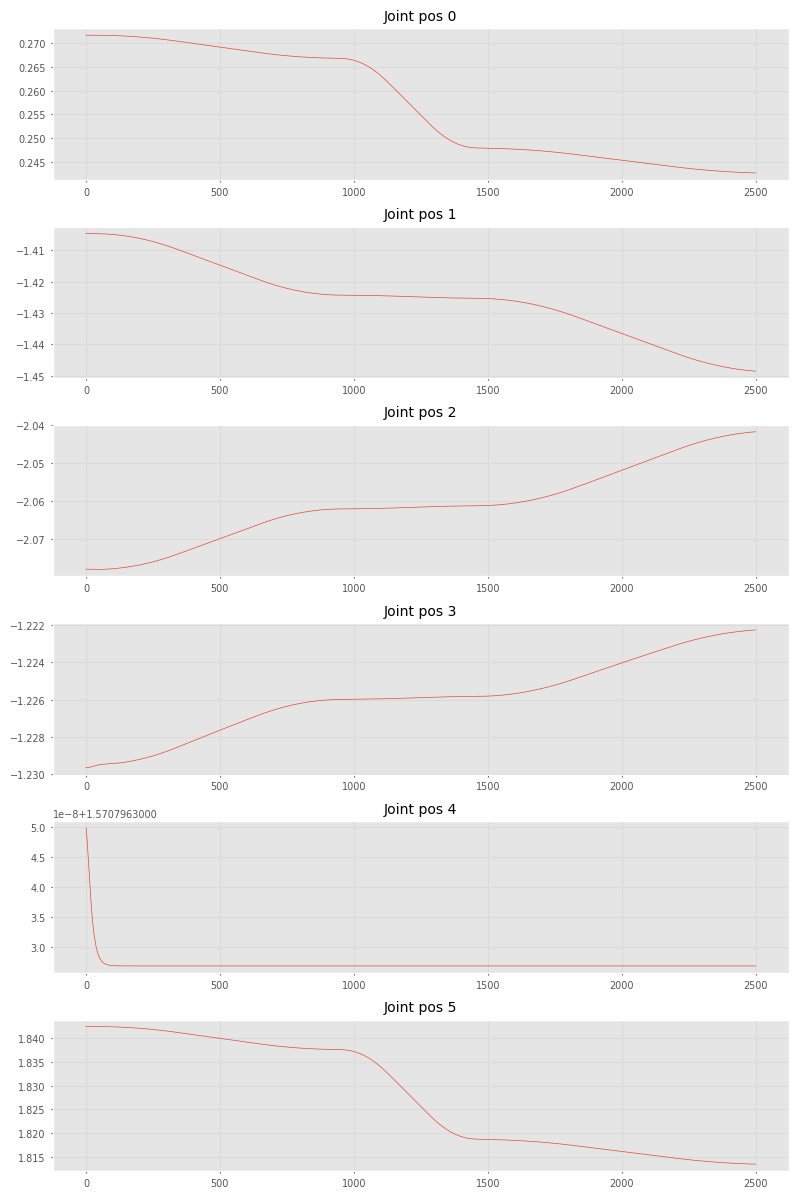

In [42]:


fig, axs = plt.subplots(6, 1, figsize=(8, 12))

axs[0].plot(joints[:,0])
axs[0].set_title('Joint pos 0')

axs[1].plot(joints[:,1])
axs[1].set_title('Joint pos 1')

axs[2].plot(joints[:,2])
axs[2].set_title('Joint pos 2')

axs[3].plot(joints[:,3])
axs[3].set_title('Joint pos 3')

axs[4].plot(joints[:,4])
axs[4].set_title('Joint pos 4')

axs[5].plot(joints[:,5])
axs[5].set_title('Joint pos 5')

plt.tight_layout()
plt.show()


# Save to CSV

In [86]:
import pandas as pd


# Create DataFrame
df = pd.DataFrame({
    "actual_position_0": positions_as_rpy[:,0],
    "actual_position_1": positions_as_rpy[:,1],
    "actual_position_2": positions_as_rpy[:,2],
    "actual_position_3": positions_as_rpy[:,3],
    "actual_position_4": positions_as_rpy[:,4],
    "actual_position_5": positions_as_rpy[:,5],
    "actual_velocity_0": velocities[:,0],
    "actual_velocity_1": velocities[:,1],
    "actual_velocity_2": velocities[:,2],
    "actual_velocity_3": velocities[:,3],
    "actual_velocity_4": velocities[:,4],
    "actual_velocity_5": velocities[:,5],
    #"actual_acceleration_0": accelerations[:,0],
    #"actual_acceleration_1": accelerations[:,1],
    #"actual_acceleration_2": accelerations[:,2],
    #"actual_acceleration_3": accelerations[:,3],
    #"actual_acceleration_4": accelerations[:,4],
    #"actual_acceleration_5": accelerations[:,5],
    "actual_force_0": forces[:,0],
    "actual_force_1": forces[:,1],
    "actual_force_2": forces[:,2],
    #"actual_force_3": nan_array.flatten(),
    #"actual_force_4": nan_array.flatten(),
    #"actual_force_5": nan_array.flatten(),
    #"actual_force_filtered_0": forces_filtered[:,0],
    ##"actual_force_filtered_1": forces_filtered[:,1],
    #"actual_force_filtered_2": forces_filtered[:,2],
    #"actual_force_filtered_3": nan_array.flatten(),
    #"actual_force_filtered_4": nan_array.flatten(),
    #"actual_force_filtered_5": nan_array.flatten(),
    #"force_reference_0": -force_reference[:,0],
    #"force_reference_1": -force_reference[:,1],
    #"force_reference_2": -force_reference[:,2],
    #"force_reference_3": -force_reference[:,3],
    #"force_reference_4": -force_reference[:,4],
    #"force_reference_5": -force_reference[:,5],
    #"control_velocity_0": nan_array.flatten(),
    #"control_velocity_1": nan_array.flatten(),
    #"control_velocity_2": nan_array.flatten(),
    #"control_velocity_3": nan_array.flatten(),
    #"control_velocity_4": nan_array.flatten(),
    #"control_velocity_5": nan_array.flatten(),
    #"control_acceleration_0": control_acceleration[:,0],
    #"control_acceleration_1": control_acceleration[:,1],
    #"control_acceleration_2": control_acceleration[:,2],
    #"control_acceleration_3": control_acceleration[:,3],
    #"control_acceleration_4": control_acceleration[:,4],
    #"control_acceleration_5": control_acceleration[:,5],
    "positions_as_quat_0": positions_as_quat[:,0],
    "positions_as_quat_1": positions_as_quat[:,1],
    "positions_as_quat_2": positions_as_quat[:,2],
    "positions_as_quat_3": positions_as_quat[:,3],
    "positions_as_quat_4": positions_as_quat[:,4],
    "positions_as_quat_5": positions_as_quat[:,5],
    "positions_as_quat_6": positions_as_quat[:,6],
    "target_positions_as_quat_0": target_positions_as_quat[:,0],
    "target_positions_as_quat_1": target_positions_as_quat[:,1],
    "target_positions_as_quat_2": target_positions_as_quat[:,2],
    "target_positions_as_quat_3": target_positions_as_quat[:,3],
    "target_positions_as_quat_4": target_positions_as_quat[:,4],
    "target_positions_as_quat_5": target_positions_as_quat[:,5],
    "target_positions_as_quat_6": target_positions_as_quat[:,6],
    "target_positions_0": target_positions[:,0],
    "target_positions_1": target_positions[:,1],
    "target_positions_2": target_positions[:,2],
    "target_positions_3": target_positions[:,3],
    "target_positions_4": target_positions[:,4],
    "target_positions_5": target_positions[:,5],
    "target_velocities_0": target_velocities[:,0],
    "target_velocities_1": target_velocities[:,1],
    "target_velocities_2": target_velocities[:,2],
    "target_velocities_3": target_velocities[:,3],
    "target_velocities_4": target_velocities[:,4],
    "target_velocities_5": target_velocities[:,5],
    #"target_accelerations_0": target_accelerations[:,0],
    #"target_accelerations_1": target_accelerations[:,1],
    #"target_accelerations_2": target_accelerations[:,2],
    #"target_accelerations_3": target_accelerations[:,3],
    #"target_accelerations_4": target_accelerations[:,4],
    #"target_accelerations_5": target_accelerations[:,5],
})

# Save to CSV
df.to_csv('data/Impedance1.csv', index=False)